In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import ensemble, cross_validation, learning_curve, metrics, datasets, tree

import numpy as np
import pandas as pd

/home/igor/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/igor/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
data = datasets.load_digits()

In [4]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
X = data.data
y = data.target
cv = 10

In [7]:
X.shape

(1797, 64)

## 1Task

In [8]:
classifier = tree.DecisionTreeClassifier()

In [9]:
quality = cross_validation.cross_val_score(classifier, X, y, cv = cv)
quality

array([0.80540541, 0.89071038, 0.83425414, 0.83888889, 0.77653631,
       0.88826816, 0.89385475, 0.8258427 , 0.80225989, 0.82386364])

In [10]:
quality.mean()

0.8379884258329959

## 2Task

In [11]:
classifier = ensemble.BaggingClassifier(n_estimators=100)

In [12]:
quality = cross_validation.cross_val_score(classifier, X, y, cv = cv)
quality

array([0.87567568, 0.93442623, 0.91160221, 0.93333333, 0.90502793,
       0.98882682, 0.96648045, 0.91573034, 0.87570621, 0.91477273])

In [25]:
quality.mean()

0.947782043822723

3Task

In [27]:
classifier = ensemble.BaggingClassifier(n_estimators=100, max_features=8)

In [28]:
quality = cross_validation.cross_val_score(classifier, X, y, cv = cv)
quality

array([0.91351351, 0.95081967, 0.91160221, 0.91111111, 0.95530726,
       0.91620112, 0.98324022, 0.97191011, 0.89265537, 0.93181818])

In [29]:
quality.mean()

0.933817877146185

## 4Task

In [30]:
estimator = tree.DecisionTreeClassifier(max_features="sqrt")
classifier = ensemble.BaggingClassifier(base_estimator=estimator, n_estimators=100)

In [31]:
quality = cross_validation.cross_val_score(classifier, X, y, cv = cv)
quality

array([0.92432432, 0.97814208, 0.91712707, 0.96111111, 0.94972067,
       0.97206704, 0.98882682, 0.96629213, 0.92655367, 0.9375    ])

In [32]:
quality.mean()

0.9521664916048882

## 5Task

In [17]:
RandomForest = ensemble.RandomForestClassifier(n_estimators=100)

In [18]:
quality = cross_validation.cross_val_score(RandomForest, X, y, cv = cv)
quality

array([0.9027027 , 0.9726776 , 0.9281768 , 0.93888889, 0.96089385,
       0.97765363, 0.97206704, 0.96067416, 0.92090395, 0.94318182])

In [19]:
quality.mean()

0.947782043822723

In [22]:
def quality_n(n_trees, n_features, depth):
    RandomForest = ensemble.RandomForestClassifier(max_features=n_features, max_depth=depth,
                                                   n_estimators=n_trees)
    quality = cross_validation.cross_val_score(RandomForest, X, y, cv = cv)
    return quality.mean()

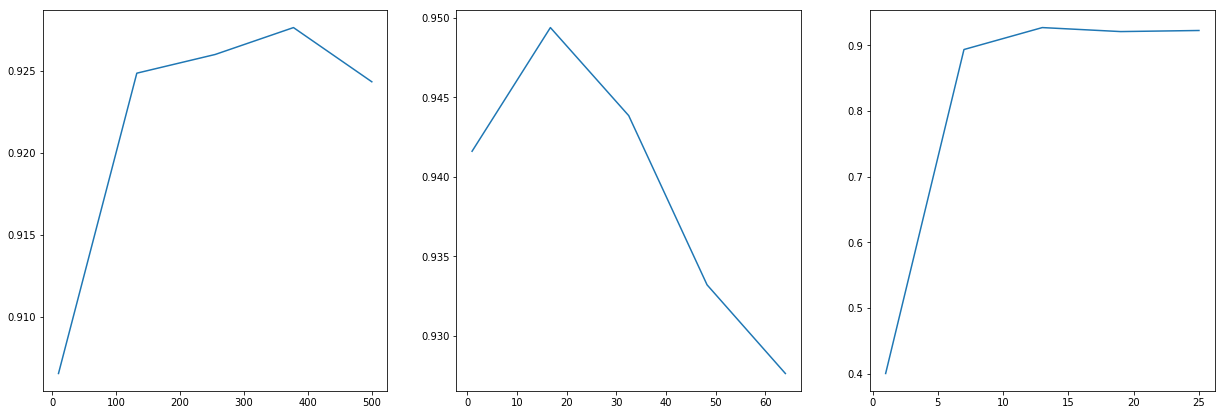

In [24]:
pyplot.figure(figsize = (21, 7))
pyplot.subplot(1,3,1)
x_1 = np.linspace(10, 500, 5)
pyplot.plot(x_1, [quality_n(int(x), None, 15) for x in x_1]) 

pyplot.subplot(1,3,2)
x_2 = np.linspace(1, 64, 5)
pyplot.plot(x_2, [quality_n(100, int(x), 15) for x in x_2]) 

pyplot.subplot(1,3,3)
x_3 = np.linspace(1, 25, 5)
pyplot.plot(x_3, [quality_n(100, None, int(x)) for x in x_3]) 

1) Случайный лес сильно переобучается с ростом количества деревьев
Нет
2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев
Да
3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
Да
4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.
Да
5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.
Нет
6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.
Нет
7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).
Да